# Task 3 : Prediction using Decision Tree Algorithm

## (Create Decision Tree classifier and visualize it graphically)

## Name - Arati Kalaskar

## Prediction using Decision Tree Algorithm for iris dataset

In [1]:
#Importing necessary libraries
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the datasets
df = pd.read_csv('iris.csv')

In [4]:
#Dropping the id column
df.drop(['Id'],axis=1,inplace=True)

In [5]:
#To display top 5 rows
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#To display bottom 5 rows
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# Shape of dataframe
df.shape

(150, 5)

In [8]:
# Check the column name
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
# To check the total null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# To view some basic statistical details.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# To check basic info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# To check value counts of Species column
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [13]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

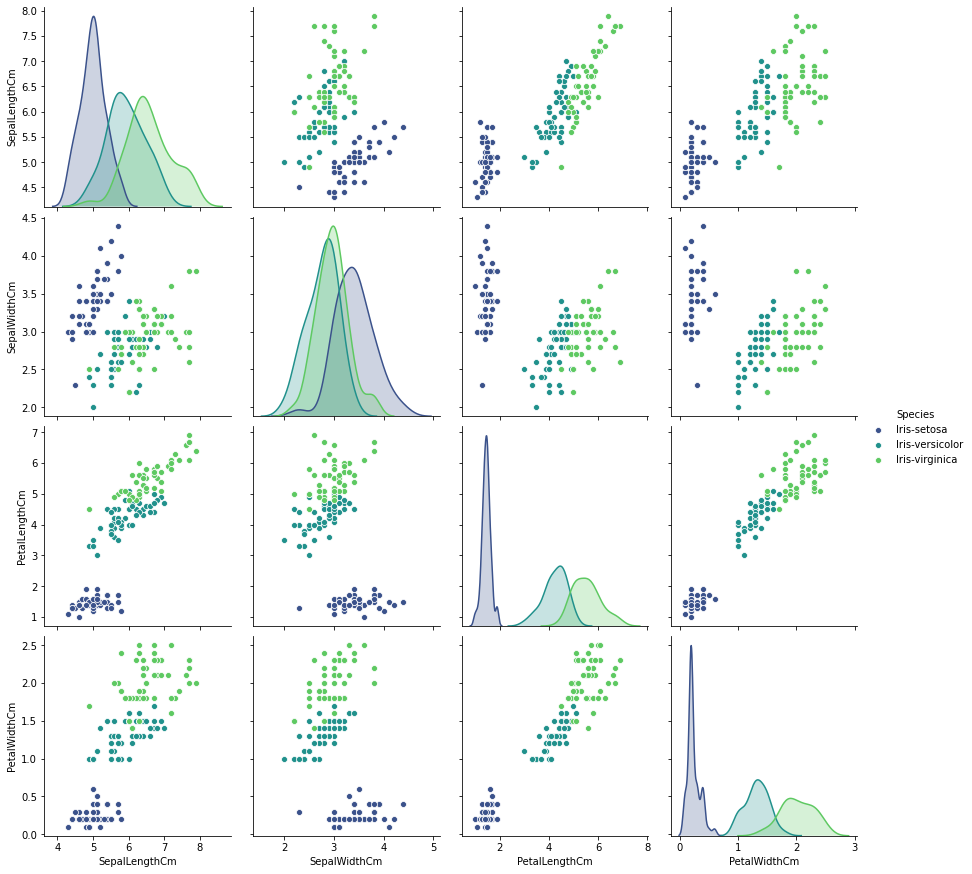

In [14]:
# Pair Plot
sns.pairplot(df, hue="Species", palette="viridis", height=3, diag_kind='kde')

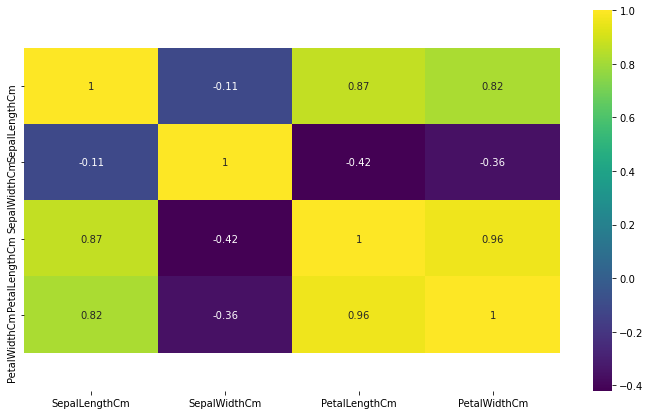

In [15]:
# Plotting the heat map
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show()

In [16]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
data_X = df.loc[:, df.columns  != 'Species']
data_Y = df[['Species']]

In [18]:
# Splitting the data into train and test. We use stratify parameter of train_test_split function to get the same class distribution across train and test sets.
X_train,X_test,Y_train,Y_test = train_test_split(data_X,data_Y,test_size = 0.3, random_state = 0)

In [19]:
X_train.reset_index(drop= True, inplace= True);
X_test.reset_index(drop= True, inplace= True);
Y_train.reset_index(drop= True, inplace= True);
Y_test.reset_index(drop= True, inplace= True);

In [20]:
for ind, column in enumerate(X_train.columns):
    scaler = StandardScaler()
    
    #fit to train data
    scaler.fit(X_train[[column]])
    
    #transform train data
    np_array = scaler.transform(X_train[[column]])
    X_train.loc[: , column] = pd.Series(np_array.flatten())
    
    #transform test data
    np_array = scaler.transform(X_test[[column]])
    X_test.loc[: , column] = pd.Series(np_array.flatten())

## Model Building

In [21]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [22]:
model3 = DecisionTreeClassifier(random_state=0, max_depth=8)

In [23]:
model3.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [24]:
X_test_pred3 = model3.predict(X_test)
X_test_pred3

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [25]:
# Accuracy of train data
model3.score(X_train, Y_train)

1.0

In [26]:
# Accuracy of test data
model3.score(X_test,Y_test)

0.9777777777777777

In [27]:
# Defining the Confusion Matrix
def Confusion_Matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_ylim([0,5])
    sns.heatmap(cm, annot=True, fmt= '.2f', xticklabels= [0,1], yticklabels=[0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t)
    plt.show()

In [28]:
Y_test.shape

(45, 1)

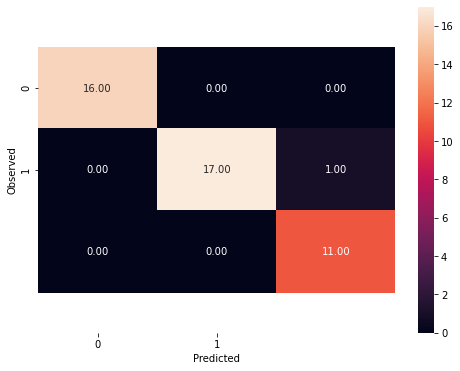

None


In [35]:
print(Confusion_Matrix(Y_test,X_test_pred3.reshape(-1,1)))

In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,X_test_pred3.reshape(-1,1))
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [31]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_pred3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Visualising the Decision Tree Classifier Model

In [32]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Arati\New' is not recognized as an internal or external command,
operable program or batch file.


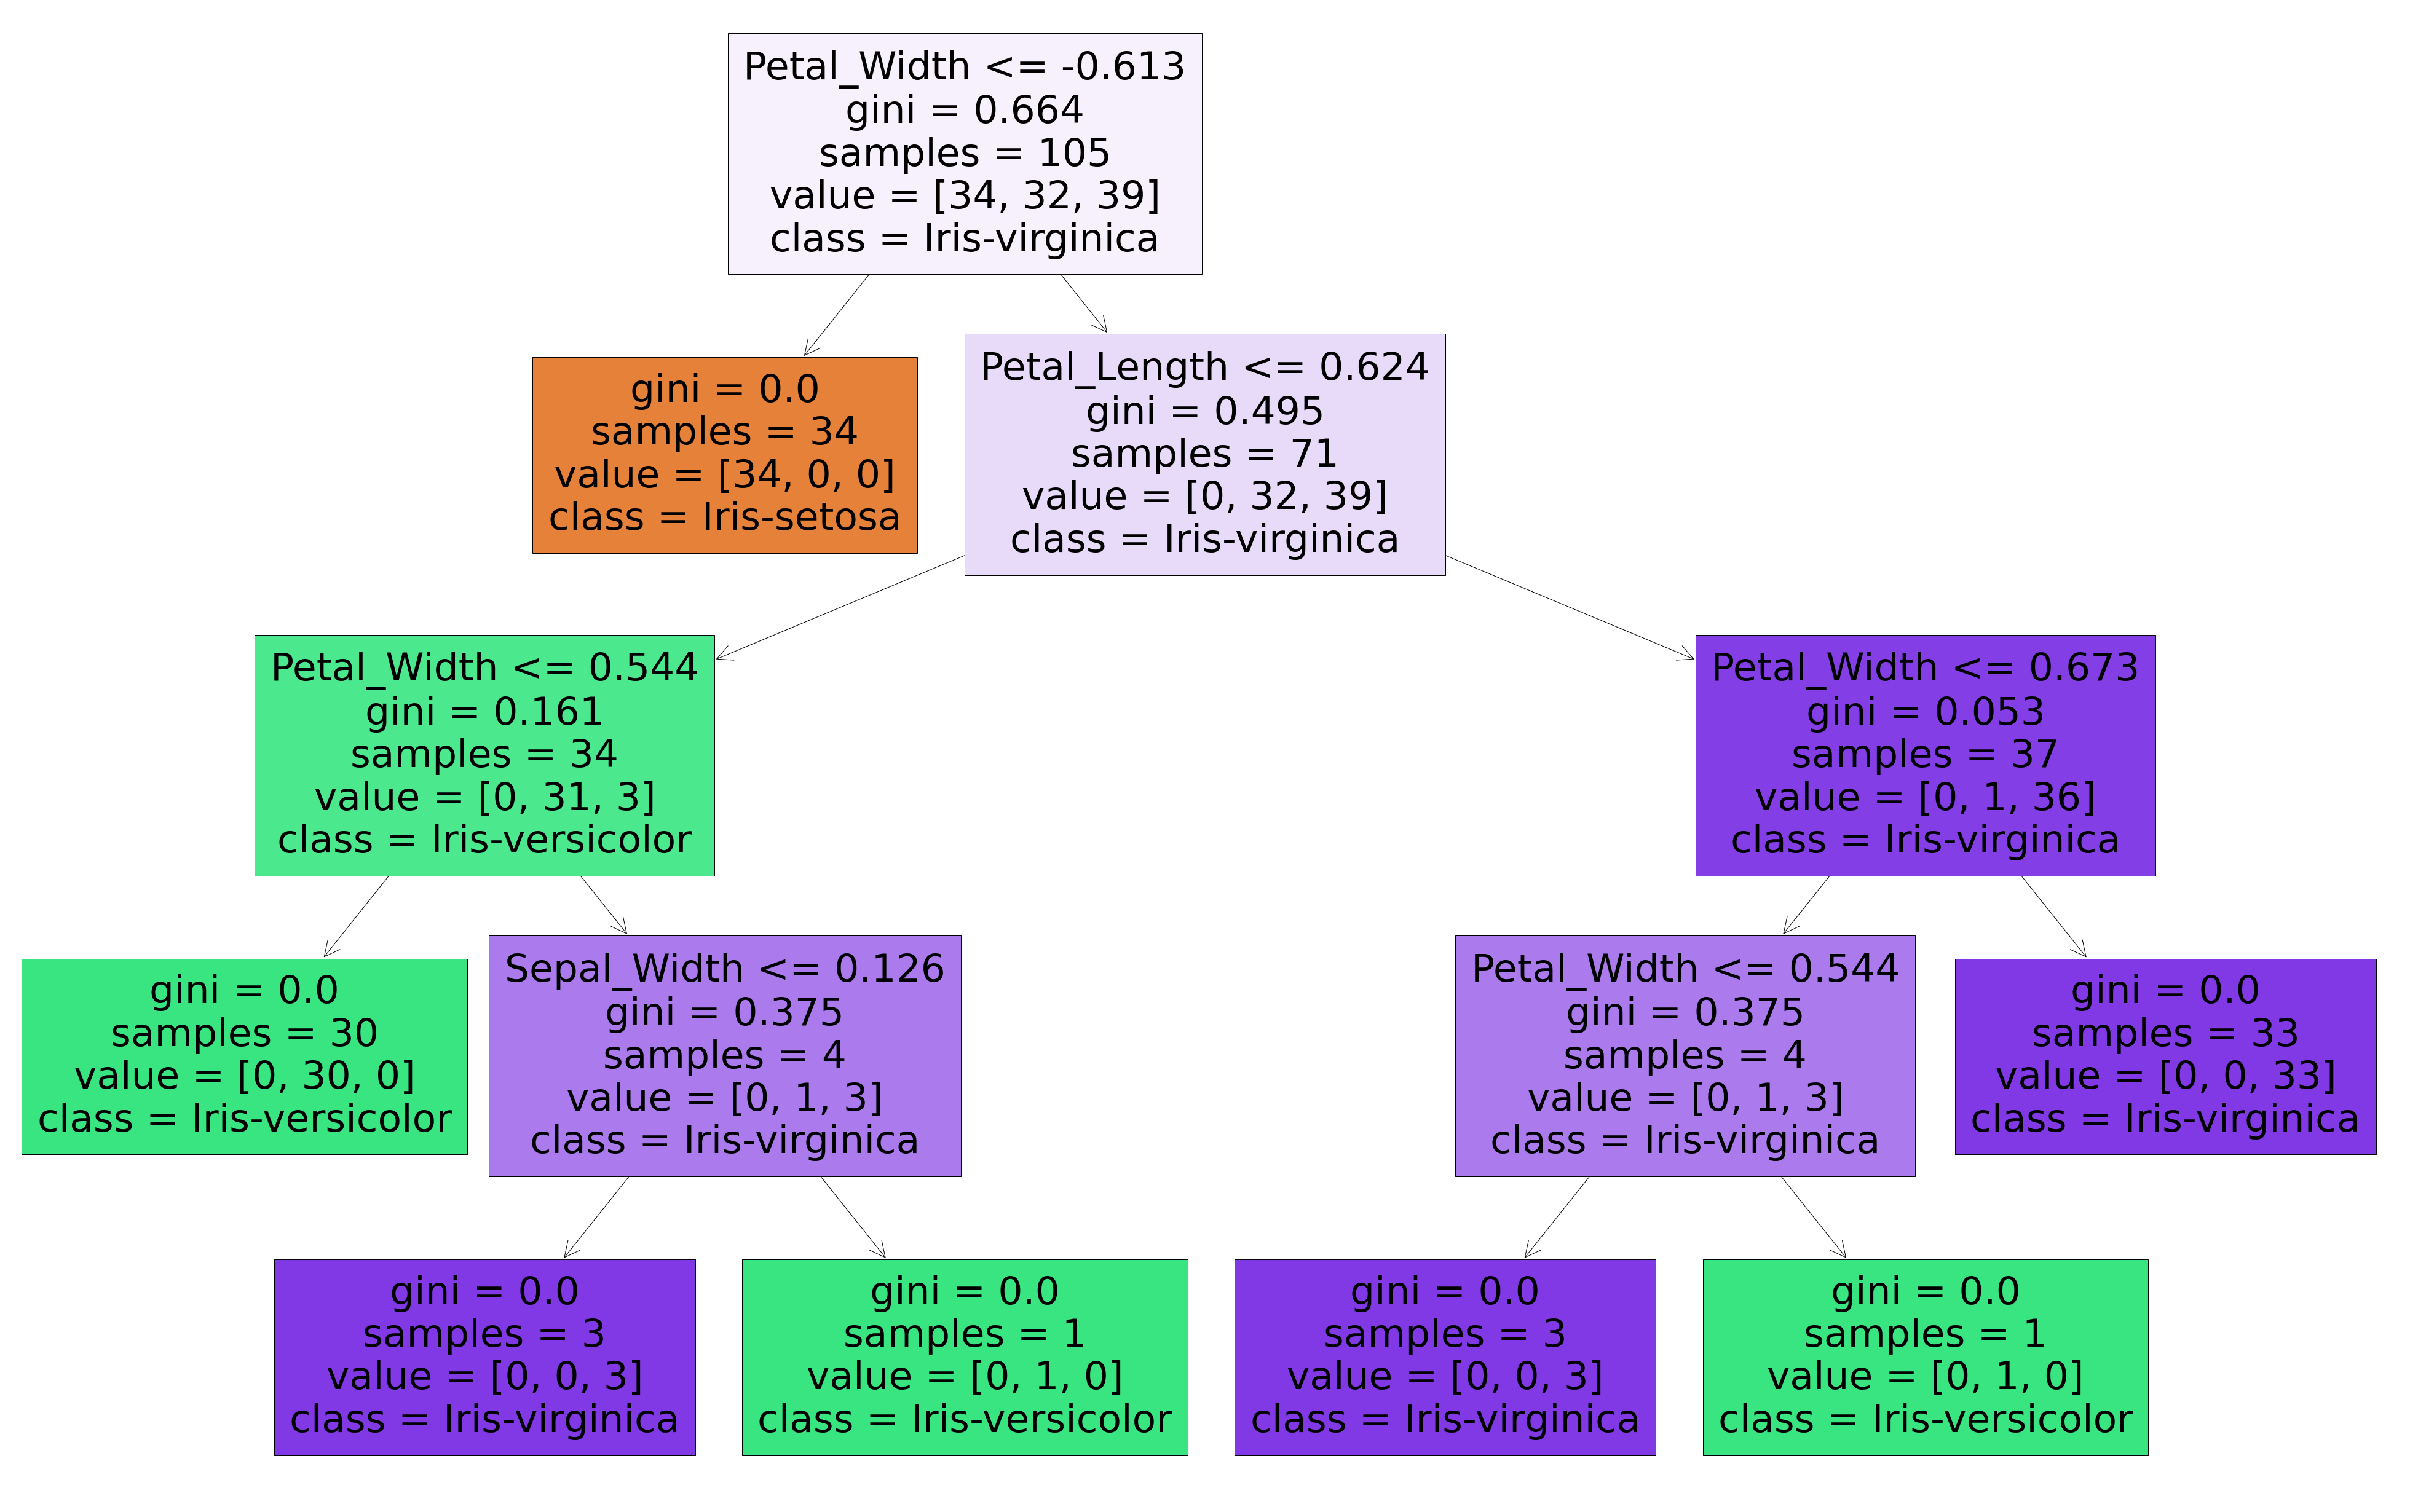

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
features_names = list(df.columns[:4])

from sklearn.tree import plot_tree
plt.figure(figsize=(70,45))
plot_tree(model3,feature_names=feature_names,class_names=class_names,filled=True);

### *Thank You !*